In [5]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
importlib.reload(tensorflow)

<module 'tensorflow' from '/miniconda/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [121]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    NOTE: Taken from sklearn example
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    
    #ax.figsize((10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [36]:
tqdm.pandas()

In [37]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [4]:
import sys

In [ ]:
!{sys.executable} -m list

### Get postive samples

In [38]:
drugbank = pkl.load(open('data/drugbank_embds.pkl', 'rb'))

In [39]:
drugbank

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism,pubchem_id,pubchem_name,target_gene_fingerprint,drug_fingerprint
31,128270-60-0,DB00006,Bivalirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human,16129704,Bivalirudin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.10044218 0.18559723 -0.12865402 -0.0650997 ...
53,65807-02-5,DB00014,Goserelin,[agonist],>lcl|BSEQ0036957|Lutropin-choriogonadotropic h...,>lcl|BSEQ0010174|Lutropin-choriogonadotropic h...,BE0000134,Lutropin-choriogonadotropic hormone receptor,Human,5311128,goserelin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.1331214 0.2391842 -0.14361311 -0.14107014 0...
54,65807-02-5,DB00014,Goserelin,[agonist],>lcl|BSEQ0000405|Gonadotropin-releasing hormon...,>lcl|BSEQ0018926|Gonadotropin-releasing hormon...,BE0000203,Gonadotropin-releasing hormone receptor,Human,5311128,goserelin,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.1331214 0.2391842 -0.14361311 -0.14107014 0...
131,16679-58-6,DB00035,Desmopressin,[agonist],>lcl|BSEQ0000583|Vasopressin V2 receptor\nMLMA...,>lcl|BSEQ0010065|Vasopressin V2 receptor (AVPR...,BE0000293,Vasopressin V2 receptor,Human,16051933,DESMOPRESSIN,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.051722348 0.24374117 -0.16236018 -0.1723347...
132,16679-58-6,DB00035,Desmopressin,NaN,>lcl|BSEQ0009979|Vasopressin V1a receptor\nMRL...,>lcl|BSEQ0009980|Vasopressin V1a receptor (AVP...,BE0000165,Vasopressin V1a receptor,Human,16051933,DESMOPRESSIN,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.051722348 0.24374117 -0.16236018 -0.1723347...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,197922-42-2,DB08900,Teduglutide,[agonist],>lcl|BSEQ0011545|Glucagon-like peptide 2 recep...,>lcl|BSEQ0011546|Glucagon-like peptide 2 recep...,BE0002134,Glucagon-like peptide 2 receptor,Human,16139605,Teduglutide,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.15734409 0.22184908 -0.10869281 -0.08885931...
440,782500-75-8,DB09043,Albiglutide,[agonist],>lcl|BSEQ0010605|Glucagon-like peptide 1 recep...,>lcl|BSEQ0010606|Glucagon-like peptide 1 recep...,BE0000857,Glucagon-like peptide 1 receptor,Human,122173812,Albiglutide,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.15686676 0.2130656 -0.10459428 -0.094190985...
457,8063-17-0,DB09363,Rauwolfia serpentina root,[inhibitor],>lcl|BSEQ0000236|Synaptic vesicular amine tran...,>lcl|BSEQ0009946|Synaptic vesicular amine tran...,BE0000118,Synaptic vesicular amine transporter,Human,441975,Ajmalicine,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.055649024 0.22807583 -0.18862249 -0.1470914...
460,844439-96-9,DB09564,Insulin Degludec,[ligand],>lcl|BSEQ0036940|Insulin receptor\nMATGGRRGAAA...,>lcl|BSEQ0020443|Insulin receptor (INSR)\nATGG...,BE0000033,Insulin receptor,Human,118984462,Insulin degludec,[1.2739266e-05 -2.7748918e-05 0.00095751503 0....,[0.077604994 0.26912978 -0.12892634 -0.1319705...


In [40]:
drugbank['target_gene_code'] = drugbank['target_gene'].apply(lambda x: ''.join(list(x.split('\n')[1:])))
#drugbank['target_amino_code'] = drugbank['target_amino'].apply(lambda x: ''.join(list(x.split('\n')[1:])))

In [41]:
with open ('data/chem_cid_SMILE_fngr_vector_fngr.pickle', 'rb') as f:
    smiles_df = pkl.load(f)
    
smiles_df['cid'] = smiles_df['cid'].astype(int)
drugbank = pd.merge(smiles_df, drugbank, right_on = 'pubchem_id', left_on = 'cid', how = 'right')

In [42]:
drugbank = drugbank[['drug_id', 'target_id', 'fingerprint', 'target_gene_code']]
drugbank = drugbank[~ drugbank['fingerprint'].isna()]
drugbank = drugbank.rename(columns = {'fingerprint': 'drug_fingerprint_code', 'target_id': 'gene_id'})

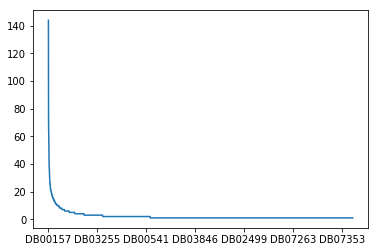

In [43]:
drugbank['drug_id'].value_counts().plot()

## NOTE: Why does NAD Bind to so many molecules?

In [44]:
drugbank[drugbank['drug_id'] == 'DB00157']

,drug_id,gene_id,drug_fingerprint_code,target_gene_code
7833,DB00157,BE0000645,2968968094 4140259565 3218693969 2070178920 32...,ATGTTTGAAATTAAGAAGATCTGTTGCATCGGTGCAGGCTATGTTG...
7834,DB00157,BE0000227,2968968094 4140259565 3218693969 2070178920 32...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...
7835,DB00157,BE0000299,2968968094 4140259565 3218693969 2070178920 32...,ATGGCGGCGGCGGCCAAGCCCAACAACCTTTCCCTGGTGGTGCACG...
7836,DB00157,BE0000360,2968968094 4140259565 3218693969 2070178920 32...,ATGGGCACCAAGGGCAAAGTTATTAAATGCAAAGCAGCCATCGCCT...
7837,DB00157,BE0000465,2968968094 4140259565 3218693969 2070178920 32...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...
...,...,...,...,...
7972,DB00157,BE0000096,2968968094 4140259565 3218693969 2070178920 32...,ATGCCAAGATGGTATTTTCTTTTGGCAAGATGCTTTGGTTGTGCAG...
7973,DB00157,BE0000735,2968968094 4140259565 3218693969 2070178920 32...,ATGGAGCGTCCGCAACCCGACAGCATGCCCCAGGATTTGTCAGAGG...
7974,DB00157,BE0000587,2968968094 4140259565 3218693969 2070178920 32...,ATGTCAGCGGAAGTGGAAACCTCAGAGGGGGTAGACGAGTCAGAAA...
7975,DB00157,BE0000344,2968968094 4140259565 3218693969 2070178920 32...,ATGTGGGAGCTCGTGGCTCTCTTGCTGCTTACCCTAGCTTATTTGT...


### Get DrugID -> Fingerprint mapping from positive samples

In [45]:
drug_map = drugbank[['drug_id', 'drug_fingerprint_code']].drop_duplicates('drug_id').set_index('drug_id')
target_map = drugbank[['gene_id', 'target_gene_code']].drop_duplicates('gene_id').set_index('gene_id')

In [46]:
negative_df = pd.read_csv('data/negative_samples_thrsh_12')[['node_0','node_1','shortest_path']] 
negative_df = negative_df.rename(columns = {'node_0': 'drug_id', 'node_1': 'gene_id'})
negative_df = negative_df[negative_df['drug_id'].str.contains('DB') & negative_df['gene_id'].str.contains('BE')]

In [47]:
negative_df = pd.merge(negative_df, drug_map, left_on = 'drug_id', right_index = True, how = 'left')
negative_df = pd.merge(negative_df, target_map, left_on = 'gene_id', right_index = True, how = 'left')

In [48]:
negative_df

,drug_id,gene_id,shortest_path,drug_fingerprint_code,target_gene_code
1,DB04481,BE0002266,12.0,2245384272 4022716898 2245273601 1735424888 22...,ATGGCGACCTCCACGGGTCGCTGGCTTCTCCTCCGGCTTGCACTAT...
3,DB04481,BE0000206,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGTTTGACTGTATGGATGTTCTGTCAGTGAGTCCTGGGCAAATCC...
4,DB04481,BE0002401,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGGCAGCAGACCTGGGCCCCTGGAATGACACCATCAATGGCACCT...
6,DB04481,BE0004180,13.0,2245384272 4022716898 2245273601 1735424888 22...,ATGACGGAAAACAAAGGATCTTCTCAGCCTAAGAAAAACGGTAATA...
10,DB04481,BE0002840,12.0,2245384272 4022716898 2245273601 1735424888 22...,ATGAAATTTCTTCTGGACATCCTCCTGCTTCTCCCGTTACTGATCG...
...,...,...,...,...,...
1745404,DB01260,BE0003634,12.0,2246728737 1861965050 2976816164 2446814304 31...,ATGTTGTTCTCCGCCCTCCTGCTGGAGGTGATTTGGATCCTGGCTG...
1745410,DB01134,BE0003634,14.0,2246728737 1861965050 2976816164 778974661 296...,ATGTTGTTCTCCGCCCTCCTGCTGGAGGTGATTTGGATCCTGGCTG...
1745423,DB08040,BE0002410,12.0,2246728737 3537119515 2245273601 2637439965 22...,ATGAAAGTTGGAGTGCTGTGGCTCATTTCTTTCTTCACCTTCACTG...
1745424,DB01105,BE0002410,13.0,2246728737 3537119515 2245273601 2423543607 22...,ATGAAAGTTGGAGTGCTGTGGCTCATTTCTTTCTTCACCTTCACTG...


#### Note: Around 13% of negative samples don't match a drug id. Since the number is small, we ignore it for now

In [49]:
len(negative_df[(negative_df['target_gene_code'].isna()) |
                (negative_df['drug_fingerprint_code'].isna())])/len(negative_df)

negative_df = negative_df[(~ negative_df['target_gene_code'].isna()) &
                (~ negative_df['drug_fingerprint_code'].isna())]

In [50]:
negative_df['Y'] = 0
drugbank['Y'] = 1
drugbank = drugbank.append(negative_df.sample(int(len(drugbank)*5))) ## NUMBER OF NEGATIVE SAMPLES TO PICK
drugbank = drugbank.drop('shortest_path', axis = 1)

/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
drugbank[drugbank['target_gene_code'].str.contains('S').isna()]

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y


In [52]:
drugbank = drugbank[~ drugbank['drug_fingerprint_code'].str.contains('n')]

#### The dataset is clean and balanced

In [53]:
drugbank['Y'].value_counts()/len(drugbank)

0    0.83331
1    0.16669
Name: Y, dtype: float64

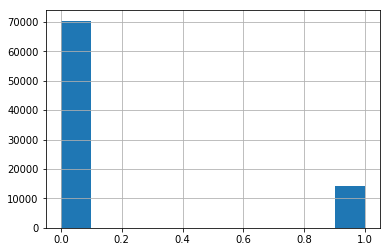

In [54]:
drugbank['Y'].hist()

#### Preprocessing fingerprints to feed to CNN

In [55]:
label_encoder = LabelEncoder()
label_encoder.fit(list(drugbank['target_gene_code'].iloc[0]))

with open('data/gene_encoder.pkl', 'wb') as f:
    pkl.dump(label_encoder, f)
    
gene_chars = set(list(drugbank['target_gene_code'].iloc[0]))

drugbank['target_gene_encoded'] = drugbank['target_gene_code'].progress_apply(\
                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
drugbank['drug_fingerprint_encoded'] = drugbank['drug_fingerprint_code'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

In [56]:
drugbank.head()

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded
0,DB03313,BE0001349,2246728737 3545365497 2246699815 2664995851 86...,ATGGTCTCAGGAACGGTGGGCAGAGGTACGGCGCTGGGCGCGGTGC...,1,"[0, 3, 2, 2, 3, 1, 3, 1, 0, 2, 2, 0, 0, 1, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
1,DB03313,BE0004335,2246728737 3545365497 2246699815 2664995851 86...,ATGCAAAATCAATTAAATGAATTAAAACGAAAAATGCTGGAATTTT...,1,"[0, 3, 2, 1, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
2,DB03313,BE0004290,2246728737 3545365497 2246699815 2664995851 86...,ATGAACAAACCAACGATTCTGCGCCTAATCAAGTATCTGAGCATTA...,1,"[0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
3,DB03313,BE0003624,2246728737 3545365497 2246699815 2664995851 86...,ATGAGACTGATTTGTATGAGAAAATTTAACAGCCATTCGATTCCGA...,1,"[0, 3, 2, 0, 2, 0, 1, 3, 2, 0, 3, 3, 3, 2, 3, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."
4,DB03313,BE0004644,2246728737 3545365497 2246699815 2664995851 86...,ATGAAATTAGATAAATTATTTGAGAAATTTCTTTCTCTTTTTAAAA...,1,"[0, 3, 2, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 5, 3, ..."


#### Calculate length mismatches and pad

In [57]:
drugbank['target_gene_encoded_len'] = drugbank['target_gene_encoded']\
                                    .apply(lambda x: len(x))
drugbank['drug_fingerprint_encoded_len'] = drugbank['drug_fingerprint_encoded']\
                                    .apply(lambda x: len(x))

In [58]:
drugbank['mismatch'] = drugbank[['target_gene_encoded', 'drug_fingerprint_encoded']]\
                        .apply(lambda x: len(x['target_gene_encoded']) - len(x['drug_fingerprint_encoded']), axis = 1)

## Most Genes are longer than fingerprints

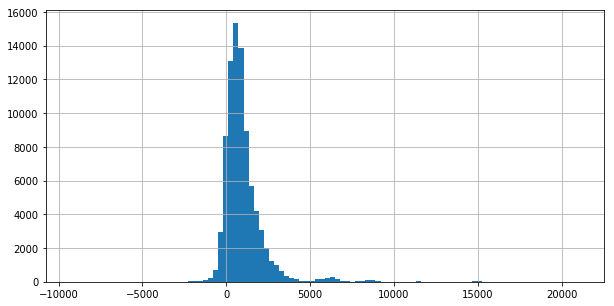

In [59]:
drugbank['mismatch'].hist(bins = 100, figsize = (10, 5))

In [60]:
print('95 percent of the mismatches are of the range %f to %f' % (max(drugbank['mismatch'].value_counts()) - np.std(drugbank['mismatch'].value_counts()),
                                                           max(drugbank['mismatch'].value_counts()) + np.std(drugbank['mismatch'].value_counts())))

95 percent of the mismatches are of the range 64.439060 to 97.560940


In [61]:
max_target_gene_encoded_len = max(drugbank['target_gene_encoded_len'])
max_drug_fingerprint_encoded_len = max(drugbank['drug_fingerprint_encoded_len'])

In [62]:
drugbank['target_gene_encoded_mismatch'] = max_target_gene_encoded_len - drugbank['target_gene_encoded_len']

In [63]:
drugbank['drug_fingerprint_encoded_mismatch'] = max_drug_fingerprint_encoded_len - drugbank['drug_fingerprint_encoded_len'] 

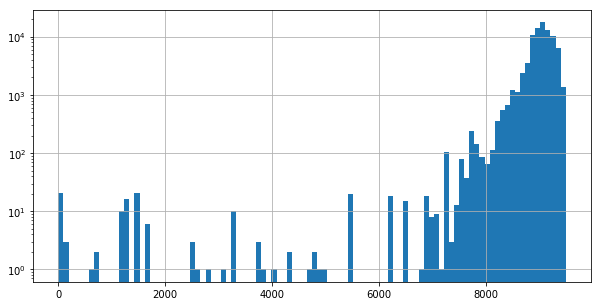

In [64]:
drugbank['drug_fingerprint_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

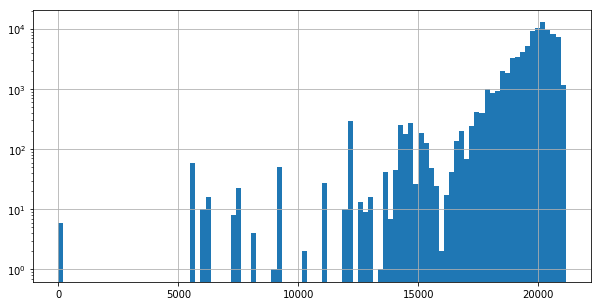

In [65]:
drugbank['target_gene_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

#### There appears to be quite large intracolumn mismatches in length. Unsure how to deal with it now. Current strategy is to pad the inputs and model it

In [66]:
drugbank['target_gene_encoded_padded'] = drugbank[['target_gene_encoded','target_gene_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['target_gene_encoded_mismatch']/2))] +   
                                                        list(x['target_gene_encoded']) +
                                                        ['-1' for i in range (int(x['target_gene_encoded_mismatch']/2))]
                                                        , axis = 1)
drugbank['target_gene_encoded_padded'] = drugbank['target_gene_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_target_gene_encoded_len else x)

In [67]:
drugbank['drug_fingerprint_encoded_padded'] = drugbank[['drug_fingerprint_encoded','drug_fingerprint_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['drug_fingerprint_encoded_mismatch']/2))] +   
                                                        list(x['drug_fingerprint_encoded']) +
                                                        ['-1' for i in range (int(x['drug_fingerprint_encoded_mismatch']/2))]
                                                        , axis = 1)

drugbank['drug_fingerprint_encoded_padded'] = drugbank['drug_fingerprint_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_drug_fingerprint_encoded_len else x)

In [69]:
drugbank.sort_values('Y')

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
1279543,DB02704,BE0004010,2968968094 1824088295 2976033787 1228528465 29...,ATGCATTTAAATCCAGCAGAGAAAGAAAAATTACAAATTTTTCTAG...,0,"[0, 3, 2, 1, 0, 3, 3, 3, 0, 0, 0, 3, 1, 1, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 8, 2, 4, 0, ...",303,916,-613,20919,8585,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
792055,DB06684,BE0001790,2968968094 2803848648 2968968094 2803848648 20...,ATGGAAATTAATGTGAGTAAATTAAGAACAGATTTGCCTCAAGTCG...,0,"[0, 3, 2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 2, 3, 2, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 8, 0, 3, 8, ...",957,644,313,20265,8857,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
742897,DB03811,BE0001167,3218693969 3777168895 3217380708 3585958780 21...,ATGCCAAACTACAAACTCACTTATTTTAATATGAGGGGGAGAGCAG...,0,"[0, 3, 2, 1, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, ...","[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 3, 7, 7, 7, 1, ...",600,195,405,20622,9306,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
886712,DB02095,BE0004952,3218693969 98513984 3218693969 98513984 321869...,ATGATCATCTTAATTTACTTATTTCTCTTGCTATGGGAAGACACTC...,0,"[0, 3, 2, 0, 3, 1, 0, 3, 1, 3, 3, 0, 0, 3, 3, ...","[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",834,207,627,20388,9294,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
423507,DB03698,BE0002359,2246728737 3542456614 2245384272 1173125914 22...,ATGATGATGATGATGATGATGAAAAAAATGCAGCATCAACGGCAGC...,0,"[0, 3, 2, 0, 3, 2, 0, 3, 2, 0, 3, 2, 0, 3, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",6546,1216,5330,14676,8285,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9379,DB08280,BE0000329,2246728737 3537123720 2245277810 2442433719 22...,ATGGCTTTTATGAAAAAATATCTCCTCCCCATTCTGGGGCTCTTCA...,1,"[0, 3, 2, 2, 1, 3, 3, 3, 3, 0, 3, 2, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",879,544,335,20343,8957,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9378,DB04113,BE0000465,2968968094 2142032900 2968968094 2142032900 29...,ATGAGCACAGCAGGAAAAGTAATCAAATGCAAAGCAGCTGTGCTAT...,1,"[0, 3, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 4, 2, 0, ...",1128,158,970,20094,9343,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9377,DB08198,BE0001852,2246728737 422715066 3217380708 4247217172 321...,ATGGCGTCGCAGCCAAATTCGTCTGCGAAGAAGAAAGAGGAGAAGG...,1,"[0, 3, 2, 2, 1, 2, 3, 1, 2, 1, 0, 2, 1, 1, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",3171,460,2711,18051,9041,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9388,DB09076,BE0000560,2968968094 2119439498 2968968094 1653789098 21...,ATGAATAACTCAACAAACTCCTCTAACAATAGCCTGGCTCTTACAA...,1,"[0, 3, 2, 0, 0, 3, 0, 0, 1, 3, 1, 0, 0, 1, 0, ...","[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 2, 1, 1, 9, 4, ...",1401,612,789,19821,8889,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [70]:
drugbank.sort_values('Y').reset_index(drop=True).to_csv('data/intermediate/interactions_preprocessed.csv', index = False)

In [99]:
del smiles_df, negative_df

In [100]:
del drugbank

## Building a CNN

In [6]:
drugbank = pd.read_csv('data/intermediate/interactions_preprocessed.csv', chunksize = 7500, iterator = True, converters={"target_gene_encoded_padded": \
                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
                                                                                    "drug_fingerprint_encoded_padded": \
                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})

#drugbank = drugbank.sample(7500)

In [7]:
drugbank = drugbank_reader.__next__().drop('Unnamed: 0', axis = 1)
drugbank_test = drugbank_reader.__next__().drop('Unnamed: 0', axis = 1)

NameError: name 'drugbank_reader' is not defined

# Start from here - train only on gene sequence

In [8]:
drugbank = pd.read_csv('data/intermediate/interactions_preprocessed.csv') #, converters={"target_gene_encoded_padded": \
#                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
#                                                                                    "drug_fingerprint_encoded_padded": \
#                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})

In [9]:
#drugbank

In [10]:
len(drugbank_reader)

NameError: name 'drugbank_reader' is not defined

In [ ]:
drugbank = drugbank_reader.sample(7500, replace = False)
drugbank_test = drugbank_reader.sample(7500, replace = False)

In [ ]:
train_df, test_df = train_test_split(drugbank)

In [ ]:
train_df

In [ ]:
train_df['Y'].hist()

In [ ]:
test_df

In [ ]:
test_df['Y'].hist()

In [ ]:
%%time
X_0 = np.array(list(train_df['target_gene_encoded_padded'])).astype(int) + 1
X_1 = np.array(list(train_df['drug_fingerprint_encoded_padded'])).astype(int) + 1
Y   = np.array(list(train_df['Y'])).astype(int)

In [ ]:
%%time
X_0_test = np.array(list(test_df['target_gene_encoded_padded'])).astype(int) + 1
X_1_test = np.array(list(test_df['drug_fingerprint_encoded_padded'])).astype(int) + 1
Y_test   = np.array(list(test_df['Y'])).astype(int)

In [ ]:
X_0.shape

(array([  44.,  533., 1854., 3488., 5184., 5650., 4567., 3138., 1286.,
         642.]),
 array([  490.,  1876.,  3262.,  4648.,  6034.,  7420.,  8806., 10192.,
        11578., 12964., 14350.]),
 <a list of 10 Patch objects>)

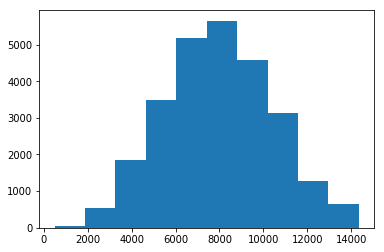

In [85]:
plt.hist(np.sum(X_0, axis =1))

(array([  31.,  236.,  651., 1212., 1721., 1868., 1454.,  995.,  400.,
         228.]),
 array([  796. ,  2142.5,  3489. ,  4835.5,  6182. ,  7528.5,  8875. ,
        10221.5, 11568. , 12914.5, 14261. ]),
 <a list of 10 Patch objects>)

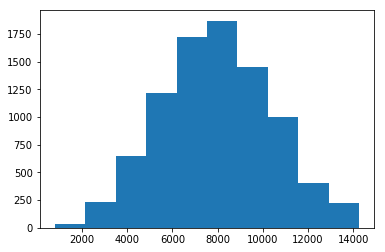

In [86]:
plt.hist(np.sum(X_0_test, axis =1))

#### Trimming the feature martrix to minimize padding. This trimming may result in loss of data from the largest SMILE and fingerprints, but are neccesary to reduce the amount of padding

In [48]:
%%time
## Trim the X of -1's. Might loose actual sequences
padding_fractions = []
padding_fraction = 0.9

while padding_fraction > 0.50:
    
    padding_fraction = len(X_0[np.where(X_0 == -1)]) / (X_0.shape[0] * X_0.shape[1])
    padding_fractions.append(padding_fraction)
    trimming_factor = 0.1

    X_0 = X_0[:,int(X_0.shape[1]*trimming_factor) : X_0.shape[1] - int(X_0.shape[1]*trimming_factor)]
    X_1 = X_1[:,int(X_1.shape[1]*trimming_factor) : X_1.shape[1] - int(X_1.shape[1]*trimming_factor)]

    X_0_test = X_0_test[:,int(X_0_test.shape[1]*trimming_factor) : X_0_test.shape[1] - int(X_0_test.shape[1]*trimming_factor)]
    X_1_test = X_1_test[:,int(X_1_test.shape[1]*trimming_factor) : X_1_test.shape[1] - int(X_1_test.shape[1]*trimming_factor)]


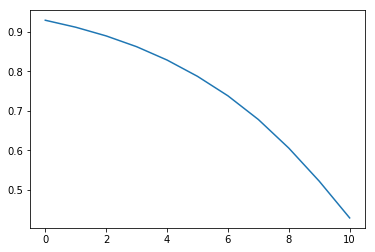

In [49]:
plt.plot(padding_fractions)

In [87]:
X_0.shape

(26386, 3470)

In [88]:
X_0_test.shape

(8796, 3470)

In [82]:
X_0 = np.hstack((X_0, X_1))
X_0_test = np.hstack((X_0_test, X_1_test))

In [53]:
X_0.shape

(26386, 2649)

In [54]:
X_0_test.shape

(8796, 2649)

In [55]:
del drugbank, drugbank_test, drugbank_reader

In [25]:
X_0.shape

(26390, 21222)

In [73]:
hidden_dims = 256
hidden_dims_2 = 256
hidden_dims_3 = 128
batch_size = 200
epochs = 3
model_optimizer = tensorflow.keras.optimizers.Nadam(lr=0.1, beta_1=0.8, beta_2=0.999)

model = Sequential()

#model.add(Dropout(0.2))
model.add(Conv1D(50000,
                 20,
                 strides=1,
                 activation='sigmoid'))


model.add(GlobalAveragePooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.0))
model.add(Activation('relu'))

model.add(GaussianNoise(hidden_dims))
model.add(Dropout(0.0))
model.add(Activation('relu'))

model.add(Dense(hidden_dims_2))
model.add(Dropout(0.1))
model.add(Activation('relu'))

model.add(Dense(hidden_dims_3))
model.add(Dropout(0.0))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=model_optimizer,
              metrics=['binary_accuracy'])




model.fit(X_0_test[..., np.newaxis], Y_test,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_0_test[..., np.newaxis], Y_test))



Train on 8796 samples, validate on 8796 samples
Epoch 1/3
8796/8796 [==============================] - 31s 4ms/step - loss: 6.3449 - binary_accuracy: 0.5983 - val_loss: 6.4740 - val_binary_accuracy: 0.5983
Epoch 2/3
8796/8796 [==============================] - 28s 3ms/step - loss: 6.4740 - binary_accuracy: 0.5983 - val_loss: 6.4740 - val_binary_accuracy: 0.5983
Epoch 3/3
8796/8796 [==============================] - 27s 3ms/step - loss: 6.4740 - binary_accuracy: 0.5983 - val_loss: 6.4740 - val_binary_accuracy: 0.5983


In [58]:
model.save('data/models/pure_cnn_gene_only_TF1p6.model')

In [61]:
Y_pred = model.predict(X_0_test[..., np.newaxis])

In [63]:
Y_pred = [1 if i > 0.5 else 0 for i in Y_pred]

In [64]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
cm = confusion_matrix(Y_test, Y_pred)

In [65]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    NOTE: Taken from sklearn example
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[3482  188]
 [ 803 3027]]
Normalized confusion matrix
[[0.94877384 0.05122616]
 [0.20966057 0.79033943]]


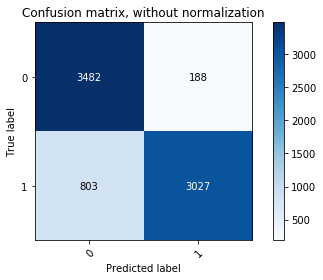

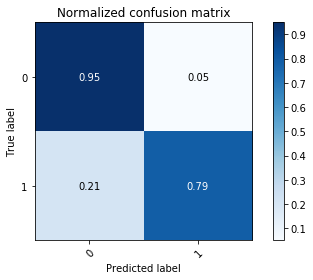

In [66]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=[0, 1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, Y_pred, classes=[0, 1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
f1_score(Y_test, Y_pred)

0.8593328601845281

## CNN in Chunks

In [108]:
from IPython.display import clear_output
class PlotLosses(tensorflow.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show()
        
        plt.plot(range(len(global_history)), global_history, label = 'Accuracy - Global')
        plt.plot(range(len(global_val_history)), global_val_history, label = 'Accuracy - Global - Va;')
        plt.legend()
        plt.show()
        
        plt.hist(predictions, label = 'Prediction Distribution')
        plt.legend()
        plt.show()    
        
        plt.hist(actual, label = 'Actual Distribution')
        plt.legend()
        plt.show()
        
plot_losses = PlotLosses()

In [58]:

#drugbank = drugbank_reader.__next__()


In [37]:
drugbank

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
16500,DB01284,BE0003634,2246728737 3537119515 2245273601 3004333805 22...,ATGTTGTTCTCCGCCCTCCTGCTGGAGGTGATTTGGATCCTGGCTG...,0,[0 3 2 ... 3 0 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",1014,4039,-3025,20208,5462,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16501,DB05327,BE0008691,2968968094 1910766508 3217380708 3234104871 86...,ATGGGGGGCTCGGGCAGTCGCCTGTCCAAGGAGCTGCTGGCCGAGT...,0,[0 3 2 2 2 2 2 2 1 3 1 2 2 2 1 0 2 3 1 2 1 1 3...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 9, 1, 0, 7, ...",576,498,78,20646,9003,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16502,DB06932,BE0002622,2246728737 422715066 3217380708 3120642300 321...,ATGGAACAACAACCATTAACATTAACGGCGGCGACAACTCGTGCGC...,0,[0 3 2 ... 3 0 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",2031,491,1540,19191,9010,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16503,DB01766,BE0000048,3218693969 98513984 3218693969 98513984 321869...,ATGGCGCACGTCCGAGGCTTGCAGCTGCCTGGCTGCCTGGCCCTGG...,1,[0 3 2 ... 3 0 2],"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",1869,306,1563,19353,9195,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16504,DB05327,BE0001814,2968968094 1910766508 3217380708 3234104871 86...,ATGCCATCACTCAGTAAAGAAGCGGCCCTGGTTCATGAAGCGTTAG...,0,[0 3 2 1 1 0 3 1 0 1 3 1 0 2 3 0 0 0 2 0 0 2 1...,"[2, 9, 6, 8, 9, 6, 8, 0, 9, 4, 1, 9, 1, 0, 7, ...",669,498,171,20553,9003,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,DB02484,BE0003635,3218693969 951226070 3218693969 571978829 2092...,ATGGGGAGGCTGCTGGCCTTAGTGGTCGGCGCGGCACTGGTGTCCT...,0,[0 3 2 2 2 2 0 2 2 1 3 2 1 3 2 2 1 1 3 3 0 2 3...,"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 5, 1, 2, 2, ...",657,574,83,20565,8927,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16996,DB02259,BE0001927,2246728737 3542456614 2245384272 618671879 321...,ATGGAAACCTATGCTGTTTTTGGTAATCCGATAGCCCACAGCAAAT...,0,[0 3 2 2 0 0 0 1 1 3 0 3 2 1 3 2 3 3 3 3 3 2 2...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",819,696,123,20403,8805,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16997,DB06855,BE0001739,2246728737 3537119515 2245273601 2423543607 22...,ATGAATCCACTCCTGATCCTTACCTTTGTGGCAGCTGCTCTTGCTG...,1,[0 3 2 0 0 3 1 1 0 1 3 1 1 3 2 0 3 1 1 3 3 0 1...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 3, 7, 1, ...",744,487,257,20478,9014,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
16998,DB06201,BE0003790,3218693969 98513984 3218693969 951226070 32173...,ATGAGCAGAAGCAAGCGTGACAACAATTTTTATAGTGTAGAGATTG...,0,[0 3 2 ... 3 2 0],"[3, 2, 1, 8, 6, 9, 3, 9, 6, 9, 9, 8, 5, 1, 3, ...",1284,330,954,19938,9171,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [7]:
def identity_block(X, f, filters):
    
    # Number Of Filters For Each Block 
    F1, F2, F3 = filters
    
    # Save Input For Shortcut
    X_shortcut = X
    
    # Component 1
    X = Conv1D(filters = F1, kernel_size = 16, strides = 1, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    # Component 2 
    X = Conv1D(filters = F2, kernel_size = f, strides = 1, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    # Component 3 
    X = Conv1D(filters = F3, kernel_size = 16, strides = 1, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    
    # Add Shortcut Path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X
    

In [8]:
def convolutional_block(X, f, filters, s = 2):
    
    # Number Of Filters For Each Block 
    F1, F2, F3 = filters
    
    # Save Input For Shortcut
    X_shortcut = X
    
    ## Main Path 
    print ("X In Conv : " + str(X.shape))
    # Component 1 
    X = Conv1D(filters = F1, kernel_size = 16, strides = s, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    print ("Component 1 : " + str(X.shape))
    
    # Component 2
    X = Conv1D(filters = F2, kernel_size = f, strides = 1, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    print ("Component 2 : " + str(X.shape))
    
    # Component 3
    X = Conv1D(filters = F3, kernel_size = 16, strides = 1, padding = 'valid', kernel_initializer = glorot_uniform())(X)
    X = BatchNormalization()(X)
    print ("Component 3 : " + str(X.shape))
    
    ## Shortcut Path
    X_shortcut = Conv1D(filters = F3, kernel_size = 16, strides = s, padding = 'valid', kernel_initializer = glorot_uniform())(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    print ("X Shortcut : " + str(X_shortcut.shape))
    
    # Add Shortcut Path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [9]:
def ResNet_1D(input_shape = (30723, 1)):
    
    X_input = Input(input_shape)
    
    # Stage 1
    print ("X Input : " + str(X_input.shape))
    X = Conv1D(filters = 64, kernel_size = 16, strides = 2, activation = 'relu', kernel_initializer = glorot_uniform())(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    print ("X : " + str(X.shape))
    
    # Stage 2 - 1 Conv Block & 2 Identity Blocks
    X = convolutional_block(X, f = 48, filters = [64, 64, 128], s = 1)
    X = identity_block(X, f = 48, filters = [64, 64, 128])
    X = identity_block(X, f = 48, filters = [64, 64, 128])
    
    # Stage 3 - 1 Conv Block & 3 Identity Blocks
    X = convolutional_block(X, f = 16, filters = [128, 128, 256])
    X = identity_block(X, f = 48, filters = [128, 128, 256])
    X = identity_block(X, f = 48, filters = [128, 128, 256])
    X = identity_block(X, f = 48, filters = [128, 128, 256])
    
    # Stage 4 - 1 Conv Block & 5 Identity Blocks
    X = convolutional_block(X, f = 32, filters = [256, 256, 512])
    X = identity_block(X, f = 48, filters = [256, 256, 512])
    X = identity_block(X, f = 48, filters = [256, 256, 512])
    X = identity_block(X, f = 48, filters = [256, 256, 512])
    X = identity_block(X, f = 48, filters = [256, 256, 512])
    X = identity_block(X, f = 48, filters = [256, 256, 512])
    
    # Stage 5 - 1 Conv Block & 2 Identity Blocks 
    X = convolutional_block(X, f = 48, filters = [512, 512, 1024])
    X = identity_block(X, f = 48, filters = [512, 512, 1024])
    X = identity_block(X, f = 48, filters = [512, 512, 1024])
    
    
    X = GlobalAveragePooling1D()(X)
    X = Flatten()(X)
    X = Dense(1, kernel_initializer = glorot_uniform())(X)
    X = Activation('sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = X)
    
    return model
    

In [10]:
def VGG_16(input_shape = (30723, 1)):

    X_input = Input(input_shape)
    
    # Convolution Block 1
    X = Conv1D(filters = 64, kernel_size = 2, strides = 6, activation = 'relu')(X_input)
    X = Conv1D(filters = 64, kernel_size = 2, strides = 6, activation = 'relu')(X)
    X = BatchNormalization()(X)
    X = AveragePooling1D()(X)
    
    # Convolution Block 2
    X = Conv1D(filters = 128, kernel_size = 2, strides = 2, activation = 'relu')(X)
    X = Conv1D(filters = 128, kernel_size = 2, strides = 2, activation = 'relu')(X)
    X = BatchNormalization()(X)
    # Test Drop Out
     X = Dropout(0.4)(X)

    # Convolution Block 3
    X = Conv1D(filters = 256, kernel_size = 2, strides = 2, activation = 'relu')(X)
    X = Conv1D(filters = 256, kernel_size = 2, strides = 2, activation = 'relu')(X)
    X = Conv1D(filters = 256, kernel_size = 2, strides = 2, activation = 'relu')(X)
    X = BatchNormalization()(X)
    # Test Drop Out
     X = Dropout(0.5)(X)

    # Convolution Block 4
    #X = Conv1D(filters = 512, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = Conv1D(filters = 512, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = Conv1D(filters = 512, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = BatchNormalization()(X)
    # Test Drop Out
    # X = Dropout(0.7)(X)

    # Convolution Block 5
    #X = Conv1D(filters = 1024, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = Conv1D(filters = 1024, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = Conv1D(filters = 1024, kernel_size = 2, strides = 2, activation = 'relu')(X)
    #X = BatchNormalization()(X)
    
    X = GlobalAveragePooling1D()(X)
    X = Flatten()(X)
    X = Dense(1, kernel_initializer = glorot_uniform())(X)
    X = Activation('sigmoid')(X)

    model = Model(inputs = X_input, outputs = X)

    return model

In [79]:
model = VGG_16()

(?, 854, 64)
(?, 427, 64)


In [80]:
# model = ResNet_1D()

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30723, 1)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5121, 64)          192       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 854, 64)           8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 854, 64)           256       
_________________________________________________________________
average_pooling1d_1 (Average (None, 427, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 213, 128)          16512     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 106, 128)          32896     
__________

In [1]:
model_optimizer = tensorflow.keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)
hidden_dims_3 = 32
batch_size = 10
epochs = 1
trim_width = 0

class_weight = {0: 1., 1: 5}

model.compile(loss = 'binary_crossentropy', optimizer = model_optimizer, class_weight = {0: 1., 1: 5}, metrics = ['binary_accuracy'])



NameError: name 'tensorflow' is not defined

In [83]:
#Uncomment to read model
#model = tensorflow.keras.models.load_model('models/CNN_GPU_VGG_85p.model')

In [102]:
#drugbank_reader = pd.read_csv('data/intermediate/interactions_preprocessed.csv', chunksize = 500, iterator = True, converters={"target_gene_encoded_padded": \
#                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
#                                                                                    "drug_fingerprint_encoded_padded": \
#                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})
#

drugbank = pd.read_csv('data/intermediate/interactions_preprocessed.csv', iterator = False, converters={"target_gene_encoded_padded": \
                                                                                     lambda x: np.array(x.strip("[]").replace("'","").split(", ")),
                                                                                    "drug_fingerprint_encoded_padded": \
                                                                                    lambda x: np.array(x.strip("[]").replace("'","").split(", "))})
drugbank = drugbank.sort_values('drug_id')
drugbank_reader = np.array_split(drugbank, len(drugbank)/500)


In [17]:
drugbank_test = drugbank_reader.__next__()

In [87]:
## Use if DRUGBANK DF is already in memory


In [103]:
drugbank_reader[1]

,drug_id,gene_id,drug_fingerprint_code,target_gene_code,Y,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,mismatch,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
82316,DB00126,BE0000138,2245384272 4022716898 2245273601 3081284555 29...,ATGCCCGCCCTCAGTCGCTGGGCCAGCCTGCCCGGCCCCAGCATGC...,1,[0 3 2 ... 3 2 0],"[2, 2, 4, 5, 3, 8, 4, 2, 7, 2, 4, 0, 2, 2, 7, ...",1854,228,1626,19368,9273,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
82317,DB00126,BE0002197,2245384272 4022716898 2245273601 3081284555 29...,ATGGCTTGTACCATCCAAAAGGCAGAAGCACTTGACGGGGCTCATT...,1,[0 3 2 ... 3 2 0],"[2, 2, 4, 5, 3, 8, 4, 2, 7, 2, 4, 0, 2, 2, 7, ...",1164,228,936,20058,9273,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
82250,DB00126,BE0002215,2245384272 4022716898 2245273601 3081284555 29...,ATGGAACCGGGGTGTGACGAGTTCCTGCCGCCACCGGAGTGCCCGG...,1,[0 3 2 ... 3 2 0],"[2, 2, 4, 5, 3, 8, 4, 2, 7, 2, 4, 0, 2, 2, 7, ...",4713,228,4485,16509,9273,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
82327,DB00126,BE0000060,2245384272 4022716898 2245273601 3081284555 29...,ATGATCTGGTATATATTAATTATAGGAATTCTGCTTCCCCAGTCTT...,1,[0 3 2 ... 3 2 0],"[2, 2, 4, 5, 3, 8, 4, 2, 7, 2, 4, 0, 2, 2, 7, ...",1605,228,1377,19617,9273,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
82318,DB00126,BE0002195,2245384272 4022716898 2245273601 3081284555 29...,ATGACCTCCTCGGGGCCTGGACCCCGGTTCCTGCTGCTGCTGCCGC...,1,[0 3 2 ... 3 2 0],"[2, 2, 4, 5, 3, 8, 4, 2, 7, 2, 4, 0, 2, 2, 7, ...",2217,228,1989,19005,9273,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,DB00144,BE0001928,2246728737 3542456614 2245384272 1173125914 22...,ATGGCTAATCCGCTATATCAGAAACATATCATTTCCATAAACGACC...,0,[0 3 2 2 1 3 0 0 3 1 1 2 1 3 0 3 0 3 1 0 2 0 0...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",936,486,450,20286,9015,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
44714,DB00144,BE0000496,2246728737 3542456614 2245384272 1173125914 22...,ATGTTAGCCTTCGCTGCCAGGACCGTGGTGAAGCCTCTGGGCTTCC...,0,[0 3 2 ... 3 2 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",1881,486,1395,19341,9015,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
28031,DB00144,BE0001832,2246728737 3542456614 2245384272 1173125914 22...,ATGAAGAGCCGAATACCTGTGGTGCTCCTGGCCTGTGGCTCCTTTA...,0,[0 3 2 0 0 2 0 2 1 1 2 0 0 3 0 1 1 3 2 3 2 2 3...,"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",492,486,6,20730,9015,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
6185,DB00144,BE0003974,2246728737 3542456614 2245384272 1173125914 22...,ATGAAAGTGATGAAGTGGAGCGCCATTGCACTGGCGGTTTCCGCAG...,0,[0 3 2 ... 3 0 0],"[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 5, 4, 2, 4, ...",1332,486,846,19890,9015,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


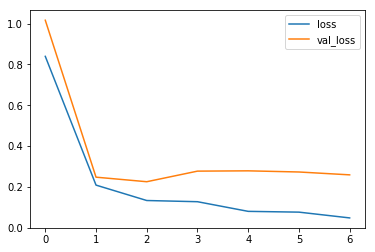

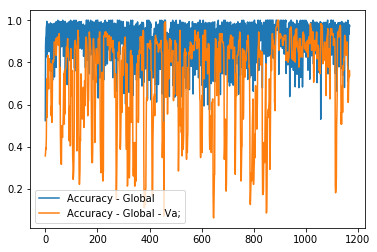

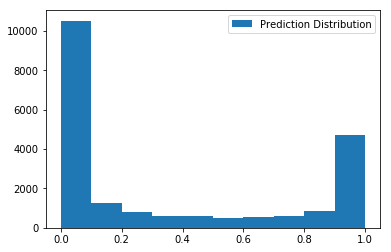

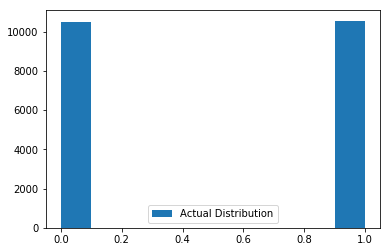

 - 1s - loss: 0.0485 - binary_accuracy: 0.9915 - val_loss: 0.2594 - val_binary_accuracy: 0.9206



In [126]:
global_history = []
global_val_history = []
predictions = []
actual = []

with open('data/gene_encoder.pkl', 'rb') as f:
    label_encoder = pkl.load(f)
    

for drugbank in tqdm(drugbank_reader):
    
    
    print('Reading chunk from file..')
    #drugbank = drugbank_reader.__next__()
    
    #drugbank['target_gene_encoded'] = drugbank['target_gene_code'].progress_apply(\
    #                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
    #drugbank['drug_fingerprint_encoded'] = drugbank['drug_fingerprint_code'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

    
    print('Sampling..')
    train_df_inter, test_df = train_test_split(drugbank)

    ##FORCE TRAIN NEGATIVE SAMPLES ON LOW EPOCH
    train_df = pd.DataFrame()
    
    if len(train_df_inter[train_df_inter['Y'] == 0]) > 2:
        train_df = train_df.append(train_df_inter[train_df_inter['Y'] == 0].sample(frac = 0.2))
    
    if len(train_df_inter[train_df_inter['Y'] == 1]) > 2:
        train_df = train_df.append(train_df_inter[train_df_inter['Y'] == 1].sample(frac = 1.0))

    
    print('Padding..') 
    X_0 = np.array(list(train_df['target_gene_encoded_padded']))
    X_1 = np.array(list(train_df['drug_fingerprint_encoded_padded']))
    Y   = np.array(list(train_df['Y']))
    

    X_0_test = np.array(list(test_df['target_gene_encoded_padded']))
    X_1_test = np.array(list(test_df['drug_fingerprint_encoded_padded']))
        
    Y_test   = np.array(list(test_df['Y']))
    
    print(X_0.shape)
    print(X_1.shape)
    
    print(X_0_test.shape)
    print(X_1_test.shape)

    print('Trimming..')
    X_0 = X_0[:, int(trim_width/2) : X_0.shape[1] - int(trim_width/2)]
    X_1 = X_1[:, int(trim_width/2) : X_1.shape[1] - int(trim_width/2)]
    
    X_0_test = X_0_test[:, int(trim_width/2) : X_0_test.shape[1] - int(trim_width/2)]
    X_1_test = X_1_test[:, int(trim_width/2) : X_1_test.shape[1] - int(trim_width/2)]
    

    X_0 = X_0.astype(int) + 1
    X_1 = X_1.astype(int) + 1
    Y   = Y.astype(int)

    X_0_test = X_0_test.astype(int) + 1
    X_1_test = X_1_test.astype(int) + 1
    Y_test   = Y_test.astype(int)
    
    print(X_0.shape)
    print(X_1.shape)
    
    print(X_0_test.shape)
    print(X_1_test.shape)


    X_0 = np.hstack((X_0, X_1))
    X_0_test = np.hstack((X_0_test, X_1_test))

    print('Modelling..')
    
    print("X0 Shape : " + str(X_0.shape))
    print("X1 Shape : " + str(X_1.shape))
    
    print("X0 Test Shape : " + str(X_0_test.shape))
    print("X1 Test Shape : " + str(X_1_test.shape))
    
    
    history = model.fit(X_0[..., np.newaxis], Y,
                          batch_size=batch_size,
                          epochs=epochs,
                          callbacks=[plot_losses],
                          validation_data=(X_0_test[..., np.newaxis], Y_test), verbose = 2)


    actual.extend(Y.tolist())
    predictions.extend(model.predict(X_0_test[..., np.newaxis]).ravel())
    
    global_val_history.extend(history.history['val_binary_accuracy'])
    global_history.extend(history.history['binary_accuracy'])


    

In [127]:
predictions

[0.98074645,
 0.88115263,
 0.99116,
 0.997341,
 0.9973665,
 0.485927,
 0.24586682,
 0.35875657,
 0.97028,
 0.023148246,
 0.91211563,
 0.9530089,
 0.983422,
 0.5242317,
 0.99864906,
 0.13026431,
 0.96479434,
 0.060366888,
 0.9585344,
 0.97205544,
 0.99859005,
 0.01454602,
 0.122733355,
 0.18603781,
 0.31022176,
 0.9940156,
 0.99561524,
 0.016234249,
 0.99978083,
 0.0010744178,
 0.0075882426,
 0.99766374,
 0.9676747,
 0.99949,
 0.9647151,
 0.9092194,
 0.99734664,
 0.98956126,
 0.7344975,
 0.9986046,
 0.0056050196,
 0.9171512,
 0.88113123,
 0.683039,
 0.11081901,
 0.005810669,
 0.028459676,
 0.5640745,
 0.99363434,
 0.95544225,
 0.47065657,
 0.036709305,
 0.30858535,
 0.9996543,
 0.49400303,
 0.8550206,
 0.97474796,
 0.96738315,
 0.9981025,
 0.9982058,
 0.55262256,
 0.9989317,
 0.99225134,
 0.07087184,
 0.9994338,
 0.5092149,
 0.99687284,
 0.99960214,
 0.025848545,
 0.36379582,
 0.999907,
 0.97094035,
 0.0273537,
 0.6304575,
 0.033402417,
 0.14404131,
 0.9724326,
 0.27622315,
 0.99869066,

In [137]:
model.save('models/CNN_GPU_VGG_rebalance.model')

In [128]:
print('Padding..') 
X_0 = np.array(list(drugbank_test['target_gene_encoded_padded']))
X_1 = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))
Y   = np.array(list(drugbank_test['Y']))


X_0_test = np.array(list(drugbank_test['target_gene_encoded_padded']))
X_1_test = np.array(list(drugbank_test['drug_fingerprint_encoded_padded']))

Y_test   = np.array(list(drugbank_test['Y']))

print(X_0.shape)
print(X_1.shape)

print(X_0_test.shape)
print(X_1_test.shape)

print('Trimming..')
X_0 = X_0[:, int(trim_width/2) : X_0.shape[1] - int(trim_width/2)]
X_1 = X_1[:, int(trim_width/2) : X_1.shape[1] - int(trim_width/2)]

X_0_test = X_0_test[:, int(trim_width/2) : X_0_test.shape[1] - int(trim_width/2)]
X_1_test = X_1_test[:, int(trim_width/2) : X_1_test.shape[1] - int(trim_width/2)]


X_0 = X_0.astype(int) + 1
X_1 = X_1.astype(int) + 1
Y   = Y.astype(int)

X_0_test = X_0_test.astype(int) + 1
X_1_test = X_1_test.astype(int) + 1
Y_test   = Y_test.astype(int)

print(X_0.shape)
print(X_1.shape)

print(X_0_test.shape)
print(X_1_test.shape)


X_0 = np.hstack((X_0, X_1))
X_0_test = np.hstack((X_0_test, X_1_test))



Y_test = model.predict(X_0[..., np.newaxis])

Padding..
(500, 21222)
(500, 9501)
(500, 21222)
(500, 9501)
Trimming..
(500, 21222)
(500, 9501)
(500, 21222)
(500, 9501)


(array([169.,  38.,  31.,  27.,  19.,  22.,  25.,  26.,  42., 101.]),
 array([1.62358174e-05, 1.00014612e-01, 2.00012989e-01, 3.00011365e-01,
        4.00009741e-01, 5.00008118e-01, 6.00006494e-01, 7.00004871e-01,
        8.00003247e-01, 9.00001624e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

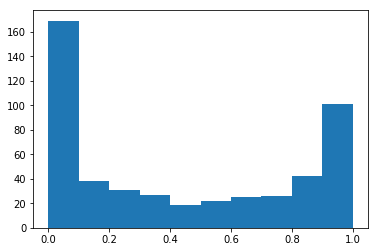

In [129]:
plt.hist(Y_test)

In [130]:
Y_test = [1 if (i > 0.5) else 0 for i in Y_test ]
cm = confusion_matrix(Y_test, Y)

In [131]:
cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

array([[0.78873239, 0.21126761],
       [0.4212963 , 0.5787037 ]])

In [132]:
f1_score(Y_test, Y)

0.6234413965087282

Confusion matrix, without normalization
[[224  91]
 [ 60 125]]
Normalized confusion matrix
[[0.71111111 0.28888889]
 [0.32432432 0.67567568]]


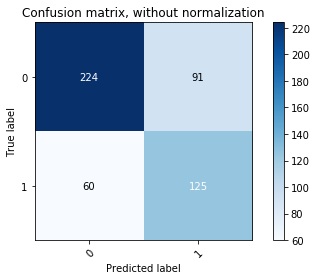

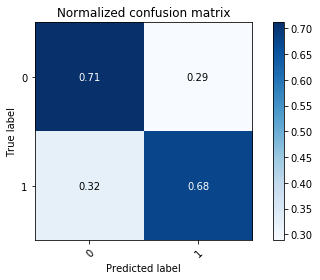

In [133]:
plot_confusion_matrix(Y, Y_test, classes=[0, 1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y, Y_test, classes=[0, 1], normalize=True,
                      title='Normalized confusion matrix')

In [138]:
print(classification_report(Y, Y_test))

             precision    recall  f1-score   support

          0       0.79      0.71      0.75       315
          1       0.58      0.68      0.62       185

avg / total       0.71      0.70      0.70       500



In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30723, 1)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5121, 64)          192       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 854, 64)           8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 854, 64)           256       
_________________________________________________________________
average_pooling1d_1 (Average (None, 427, 64)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 213, 128)          16512     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 106, 128)          32896     
__________